In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
flights1 = pd.read_csv('cleaned.csv')

In [5]:
flights1.head(10)

,Unnamed: 0,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,CRS_DEP_HOUR,CRS_ARR_HOUR,MONTH_NAME,DAY_NAME,DELAYED,DELAY_REASON
0,0,2019-01-09,UA,19977,1562,FLL,EWR,1155,1151.0,-4.0,...,0.0,0.0,0.0,0.0,11,15,January,Tuesday,0,NO_DELAY
1,1,2022-11-19,DL,19790,1149,MSP,SEA,2120,2114.0,-6.0,...,0.0,0.0,0.0,0.0,21,23,November,Friday,0,NO_DELAY
2,2,2022-07-22,UA,19977,459,DEN,MSP,954,1000.0,6.0,...,0.0,0.0,0.0,0.0,9,12,July,Thursday,0,NO_DELAY
3,3,2023-03-06,DL,19790,2295,MSP,SFO,1609,1608.0,-1.0,...,0.0,24.0,0.0,0.0,16,18,March,Sunday,1,NAS
4,4,2020-02-23,NK,20416,407,MCO,DFW,1840,1838.0,-2.0,...,0.0,0.0,0.0,0.0,18,20,February,Saturday,0,NO_DELAY
5,5,2019-07-31,WN,19393,665,DAL,OKC,1010,1237.0,147.0,...,0.0,0.0,0.0,0.0,10,11,July,Tuesday,1,CARRIER
6,6,2023-06-11,AA,19805,2134,DCA,BOS,1010,1001.0,-9.0,...,0.0,0.0,0.0,0.0,10,11,June,Saturday,0,NO_DELAY
7,7,2019-07-08,YX,20452,4464,HSV,DCA,1643,1637.0,-6.0,...,0.0,23.0,0.0,0.0,16,19,July,Sunday,1,NAS
8,8,2023-02-12,NK,20416,590,IAH,LAX,530,527.0,-3.0,...,0.0,0.0,0.0,0.0,5,7,February,Saturday,0,NO_DELAY
9,9,2020-08-22,AS,19930,223,SEA,FAI,2125,2116.0,-9.0,...,0.0,0.0,0.0,0.0,21,23,August,Friday,0,NO_DELAY


In [11]:
X = flights1[['ORIGIN', 'AIRLINE_CODE','DEST', 'ARR_DELAY', 'MONTH_NAME', 'DAY_NAME']]
categorical_features = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME']
numerical_features = ['ARR_DELAY']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

n_clusters = 5

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=0))
])

pipeline.fit(X)
X_clustered = X.copy()
X_clustered['cluster'] = pipeline.predict(X)

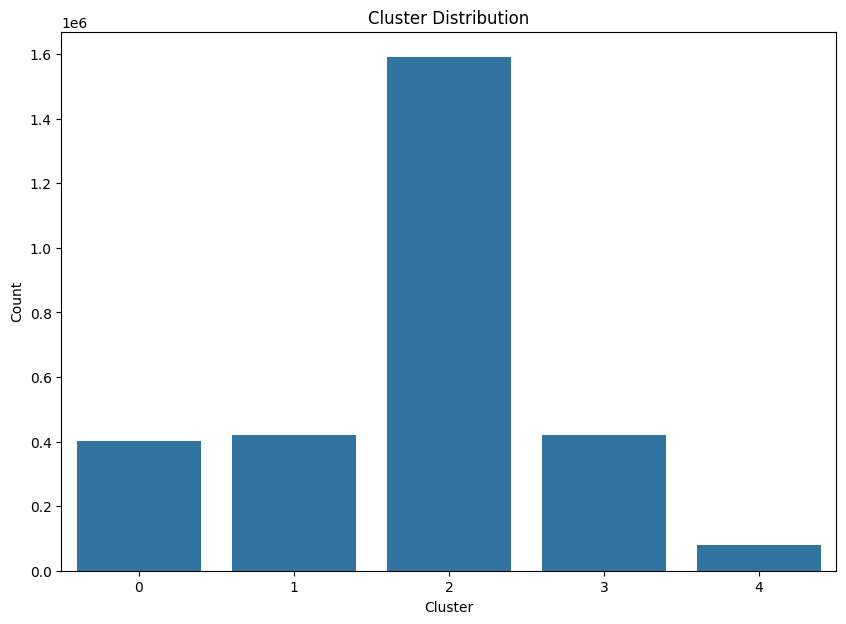

In [13]:
import seaborn as sns


plt.figure(figsize=(10, 7))
sns.countplot(data=X_clustered, x='cluster')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

C:\Users\mamoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


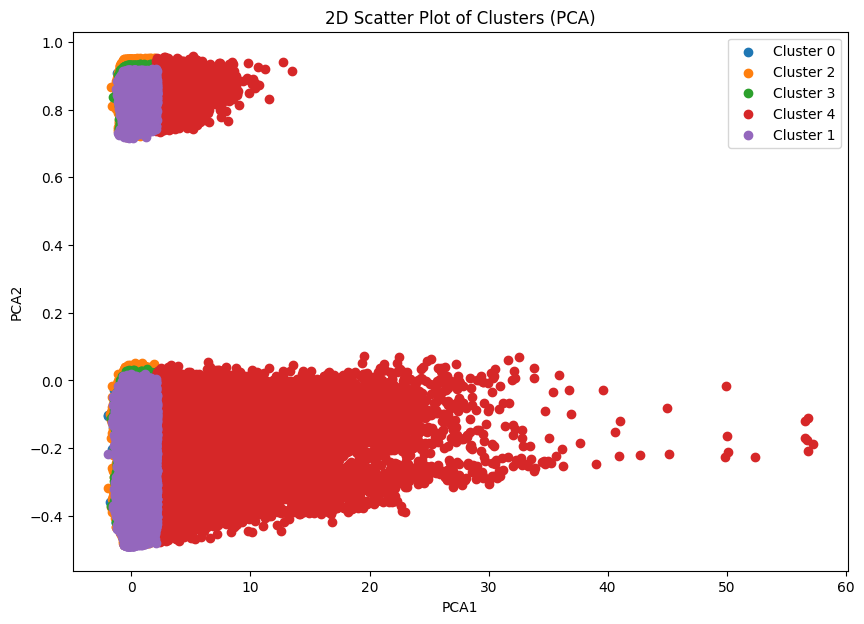

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(pipeline.named_steps['preprocessor'].transform(X))

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = X_clustered['cluster']

plt.figure(figsize=(10, 7))
for cluster in pca_df['cluster'].unique():
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('2D Scatter Plot of Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

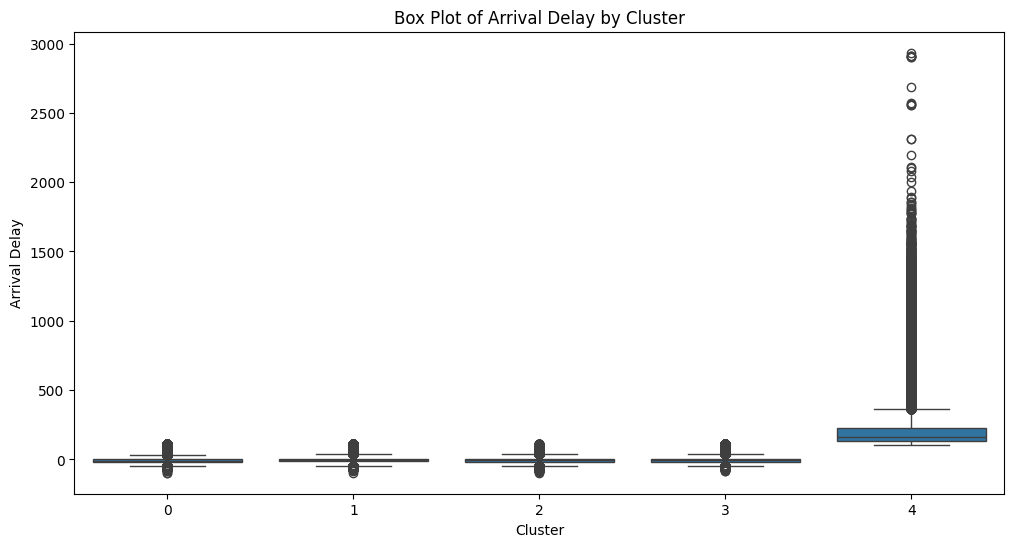

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_clustered, x='cluster', y='ARR_DELAY')
plt.title('Box Plot of Arrival Delay by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Arrival Delay')
plt.show()

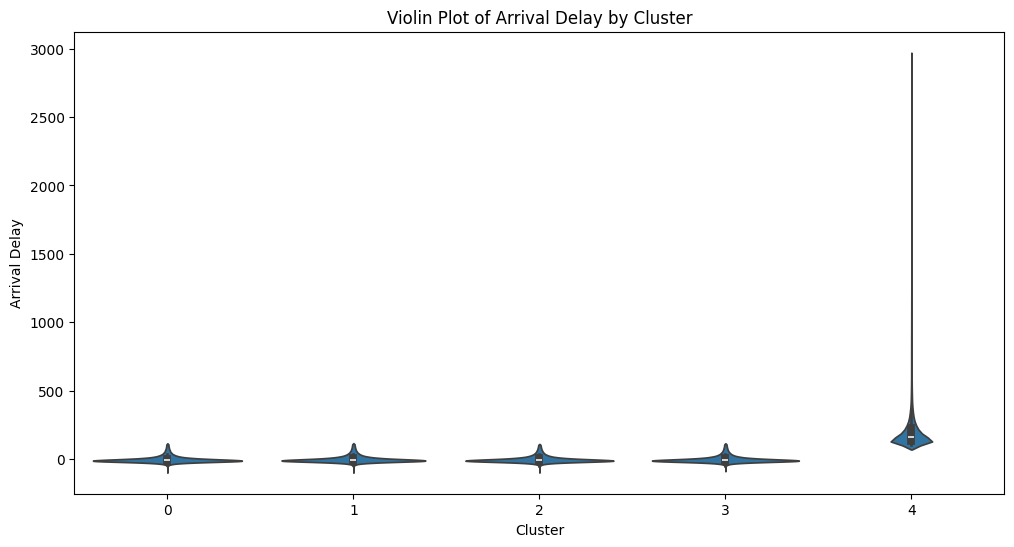

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=X_clustered, x='cluster', y='ARR_DELAY')
plt.title('Violin Plot of Arrival Delay by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Arrival Delay')
plt.show()